## <span style="color:blue">'탐색적 데이터 분석(EDA)’은 우리가 존재한다고 믿는 것들은 물론이고 존재하지 않는다고 믿는 것들을 발견하려는 태도, 유연성, 그리고 자발성이다.  - 존 튜키 </span>

### (1) 데이터에 대한 질문 & 문제 만들기
### (2) 데이터를 시각화하고, 변환하고, 모델링하여 그 질문 & 문제에 대한 답을 찾아보기
### (3) 찾는 과정에서 배운 것들을 토대로 다시 질문을 다듬고 또 다른 질문 & 문제 만들기

#### <span style="color:red">전체적으로 데이터의 속성들을 살펴본다 - 결측치와 이상치 채크와 대처</span>
#### <span style="color:red">속성 간의 관계 분석한다 - 타입, 범주형 연속형 채크, 시각화와 상관계수를 통한 상관성 채크</span>

## **EDA의 핵심 - 데이터의 결측치와 특이값(이상치) 채크와 처리**
### 데이터 읽어서 정보 보기

In [1]:
import pandas as pd
bank_df = pd.read_csv('data/bank.csv')
bank_df.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,NaN,5,may,261,1,-1,0,NaN,no
1,36,technician,single,secondary,no,265,yes,yes,NaN,5,may,348,1,-1,0,NaN,no
2,25,blue-collar,married,secondary,no,-7,yes,no,NaN,5,may,365,1,-1,0,NaN,no
3,53,technician,married,secondary,no,-3,no,no,NaN,5,may,1666,1,-1,0,NaN,no
4,24,technician,single,secondary,no,-103,yes,yes,NaN,5,may,145,1,-1,0,NaN,no


In [2]:
# 데이터의 건수, 항목수를 확인
print(bank_df.shape)

# 데이터형을 확인
print(bank_df.dtypes)

(7234, 17)
age           int64
job          object
marital      object
education    object
default      object
balance       int64
housing      object
loan         object
contact      object
day           int64
month        object
duration      int64
campaign      int64
pdays         int64
previous      int64
poutcome     object
y            object
dtype: object


In [3]:
# 데이터에 대한 여러가지 정보들을 한번에 출력
bank_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7234 entries, 0 to 7233
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        7234 non-null   int64 
 1   job        7190 non-null   object
 2   marital    7234 non-null   object
 3   education  6961 non-null   object
 4   default    7234 non-null   object
 5   balance    7234 non-null   int64 
 6   housing    7234 non-null   object
 7   loan       7234 non-null   object
 8   contact    5196 non-null   object
 9   day        7234 non-null   int64 
 10  month      7234 non-null   object
 11  duration   7234 non-null   int64 
 12  campaign   7234 non-null   int64 
 13  pdays      7234 non-null   int64 
 14  previous   7234 non-null   int64 
 15  poutcome   1334 non-null   object
 16  y          7234 non-null   object
dtypes: int64(7), object(10)
memory usage: 960.9+ KB


In [4]:
# 기술 통계량 확인- 수치 데이터에 대해서..
bank_df.describe()

,age,balance,day,duration,campaign,pdays,previous
count,7234.000000,7234.000000,7234.000000,7234.000000,7234.000000,7234.000000,7234.000000
mean,40.834808,1374.912911,15.623860,262.875311,2.713989,40.277716,0.565939
std,10.706442,3033.882933,8.307826,268.921065,2.983740,99.188008,1.825100
min,2.000000,-3313.000000,1.000000,0.000000,1.000000,-1.000000,0.000000
25%,33.000000,74.000000,8.000000,103.000000,1.000000,-1.000000,0.000000
50%,39.000000,453.500000,16.000000,183.000000,2.000000,-1.000000,0.000000
75%,48.000000,1470.750000,21.000000,321.750000,3.000000,-1.000000,0.000000
max,157.000000,81204.000000,31.000000,3366.000000,44.000000,850.000000,40.000000


### 데이터 변환

In [5]:
food = {'menu': ['짜장면', '짬뽕', '탕수육'], 'price' : ['7,000원','8,000원', '10,000원'], 'discountprice' : ['6,000원','7,000원', '8,000원'] }
df = pd.DataFrame(food)
df

,menu,price,discountprice
0,짜장면,"7,000원","6,000원"
1,짬뽕,"8,000원","7,000원"
2,탕수육,"10,000원","8,000원"


In [6]:
df.dtypes

menu             object
price            object
discountprice    object
dtype: object

In [7]:
df[['price','discountprice']] = df[['price','discountprice']].apply(lambda x : x.str.replace(',','').str.replace('원','').astype(int)) 

In [8]:
df

,menu,price,discountprice
0,짜장면,7000,6000
1,짬뽕,8000,7000
2,탕수육,10000,8000


In [9]:
df.dtypes

menu             object
price             int32
discountprice     int32
dtype: object

In [10]:
food = {'menu': ['짜장면', '짬뽕', '탕수육'], 'price' : ['7,000원','8,000원', '10,000원'], 'discountprice' : ['6,000원','7,000원', '8,000원'] }
df = pd.DataFrame(food)
df

,menu,price,discountprice
0,짜장면,"7,000원","6,000원"
1,짬뽕,"8,000원","7,000원"
2,탕수육,"10,000원","8,000원"


In [11]:
import re
df.price = df.price.apply(lambda x :re.sub('[,원]','', x)).map(int)

In [12]:
df.discountprice = df.discountprice.apply(lambda x :re.sub('[,원]','', x)).map(int)

In [13]:
df

,menu,price,discountprice
0,짜장면,7000,6000
1,짬뽕,8000,7000
2,탕수육,10000,8000


In [14]:
df.dtypes

menu             object
price             int64
discountprice     int64
dtype: object

### 결측치 확인하기

In [15]:
bank_df.isna().sum() 

age             0
job            44
marital         0
education     273
default         0
balance         0
housing         0
loan            0
contact      2038
day             0
month           0
duration        0
campaign        0
pdays           0
previous        0
poutcome     5900
y               0
dtype: int64

### 시각화해서 결측치 확인하기

<AxesSubplot:>

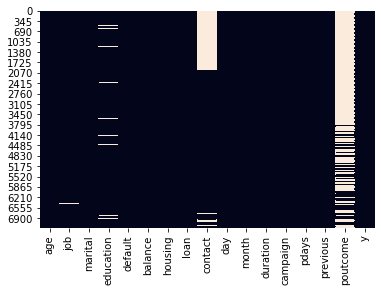

In [16]:
import seaborn as sns
sns.heatmap(bank_df.isnull(), cbar=False)

<AxesSubplot:>

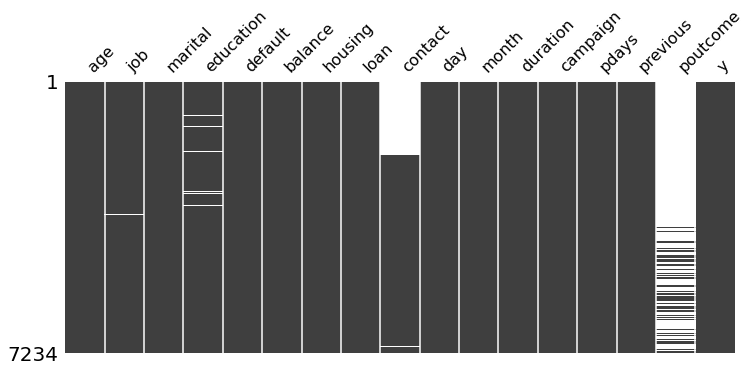

In [17]:
import missingno as msno 
msno.matrix(bank_df, figsize=(12,5), sparkline=False)

### 바로 위의 셀에서 missingo 오류가 발생하면 다음 셀을 실행시킵니다.

<AxesSubplot:>

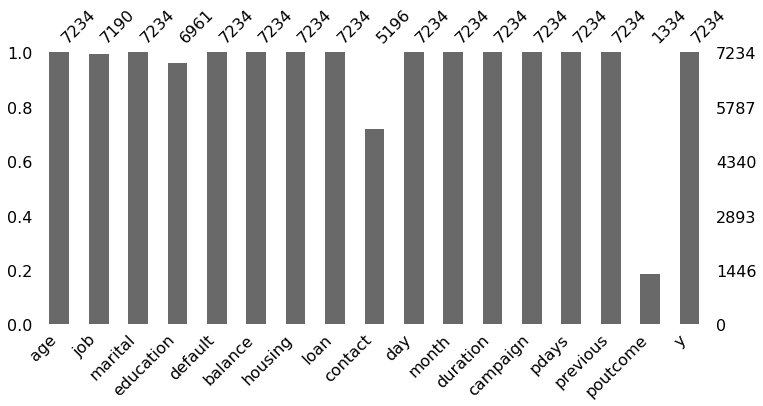

In [18]:
msno.bar(bank_df, figsize=(12,5))

### 결측치를 포함한 행 삭제

In [19]:
# job과 education 열에서 결측치가 포함된 행을 삭제
bank_df = bank_df.dropna(subset=['job', 'education'])

# 데이터의 건수, 항목수를 확인
print(bank_df.shape)

(6935, 17)


### 결측치를 2400개이상 포함한 열 삭제

In [20]:
# 결측치이 2400개 이상인 열을 제외
bank_df = bank_df.dropna(thresh=2400, axis=1) # axis 중요!!!

# 데이터의 건수, 항목수를 확인
print(bank_df.shape)
print(bank_df.info())

(6935, 16)
<class 'pandas.core.frame.DataFrame'>
Int64Index: 6935 entries, 0 to 7233
Data columns (total 16 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        6935 non-null   int64 
 1   job        6935 non-null   object
 2   marital    6935 non-null   object
 3   education  6935 non-null   object
 4   default    6935 non-null   object
 5   balance    6935 non-null   int64 
 6   housing    6935 non-null   object
 7   loan       6935 non-null   object
 8   contact    5010 non-null   object
 9   day        6935 non-null   int64 
 10  month      6935 non-null   object
 11  duration   6935 non-null   int64 
 12  campaign   6935 non-null   int64 
 13  pdays      6935 non-null   int64 
 14  previous   6935 non-null   int64 
 15  y          6935 non-null   object
dtypes: int64(7), object(9)
memory usage: 921.1+ KB
None


### 결측치 채우기

In [21]:
# 결측치을 「unknown」으로 치환
bank_df = bank_df.fillna({'contact':'unknown'})

# 선두에서 5행까지 표시
bank_df.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,no
1,36,technician,single,secondary,no,265,yes,yes,unknown,5,may,348,1,-1,0,no
2,25,blue-collar,married,secondary,no,-7,yes,no,unknown,5,may,365,1,-1,0,no
3,53,technician,married,secondary,no,-3,no,no,unknown,5,may,1666,1,-1,0,no
4,24,technician,single,secondary,no,-103,yes,yes,unknown,5,may,145,1,-1,0,no


In [22]:
import numpy as np
time_index = pd.date_range("2020-01-01", periods=5, freq="MS")

dataframe = pd.DataFrame(index=time_index)

dataframe["Sales"] = [1.0,2.0,np.nan,np.nan,5.0]
dataframe

,Sales
2020-01-01,1.0
2020-02-01,2.0
2020-03-01,NaN
2020-04-01,NaN
2020-05-01,5.0


![](images/fill.jpg)

In [23]:
# 누락된 값을 보간합니다.
dataframe.interpolate()

,Sales
2020-01-01,1.0
2020-02-01,2.0
2020-03-01,3.0
2020-04-01,4.0
2020-05-01,5.0


In [24]:
# 앞쪽으로 채우기(Forward-fill)
dataframe.ffill()

,Sales
2020-01-01,1.0
2020-02-01,2.0
2020-03-01,2.0
2020-04-01,2.0
2020-05-01,5.0


In [25]:
dataframe.fillna(method ='ffill') 

,Sales
2020-01-01,1.0
2020-02-01,2.0
2020-03-01,2.0
2020-04-01,2.0
2020-05-01,5.0


In [26]:
# 뒤쪽으로 채우기(Back-fill)
dataframe.bfill()

,Sales
2020-01-01,1.0
2020-02-01,2.0
2020-03-01,5.0
2020-04-01,5.0
2020-05-01,5.0


In [27]:
dataframe.fillna(method ='bfill') 

,Sales
2020-01-01,1.0
2020-02-01,2.0
2020-03-01,5.0
2020-04-01,5.0
2020-05-01,5.0


In [28]:
dict = {'One' :  [np.nan, np.nan, 95, 80], 
    'Two' : [np.nan, np.nan, np.nan, np.nan], 
    'Three':[52, np.nan, 80, 98], 
    'Four':[np.nan, np.nan, np.nan, 65],
    'Five':[10, None, 30, 40],
    'Six': [np.nan, np.nan, np.nan, pd.NaT],
    'Seven': [np.nan, np.nan, None, np.nan],
    'Eight': [np.nan, np.nan, None, pd.NaT]} 

df = pd.DataFrame(dict)
display(df)

,One,Two,Three,Four,Five,Six,Seven,Eight
0,NaN,NaN,52.0,NaN,10.0,NaT,NaN,NaT
1,NaN,NaN,NaN,NaN,NaN,NaT,NaN,NaT
2,95.0,NaN,80.0,NaN,30.0,NaT,NaN,NaT
3,80.0,NaN,98.0,65.0,40.0,NaT,NaN,NaT


In [29]:
df.dropna(how = 'all') 

,One,Two,Three,Four,Five,Six,Seven,Eight
0,NaN,NaN,52.0,NaN,10.0,NaT,NaN,NaT
2,95.0,NaN,80.0,NaN,30.0,NaT,NaN,NaT
3,80.0,NaN,98.0,65.0,40.0,NaT,NaN,NaT


In [30]:
df.dropna(how = 'all', axis=1) 

,One,Three,Four,Five
0,NaN,52.0,NaN,10.0
1,NaN,NaN,NaN,NaN
2,95.0,80.0,NaN,30.0
3,80.0,98.0,65.0,40.0


In [31]:
df.dropna(subset=['One', 'Four'])

,One,Two,Three,Four,Five,Six,Seven,Eight
3,80.0,NaN,98.0,65.0,40.0,NaT,NaN,NaT


In [32]:
df.dropna(subset=['Eight'])

,One,Two,Three,Four,Five,Six,Seven,Eight


In [33]:
df.isna()

,One,Two,Three,Four,Five,Six,Seven,Eight
0,True,True,False,True,False,True,True,True
1,True,True,True,True,True,True,True,True
2,False,True,False,True,False,True,True,True
3,False,True,False,False,False,True,True,True


In [34]:
df.isna().sum()

One      2
Two      4
Three    1
Four     3
Five     1
Six      4
Seven    4
Eight    4
dtype: int64

In [35]:
dict = {'First Score':[100, 90, None, 95, 85], 
        'Second Score': [30, 45, None, np.nan, 60], 
        'Third Score':[np.nan, 40, np.nan, 80, None]} 
df = pd.DataFrame(dict) 
display(df)

,First Score,Second Score,Third Score
0,100.0,30.0,NaN
1,90.0,45.0,40.0
2,NaN,NaN,NaN
3,95.0,NaN,80.0
4,85.0,60.0,NaN


In [36]:
df.isna()

,First Score,Second Score,Third Score
0,False,False,True
1,False,False,False
2,True,True,True
3,False,True,False
4,False,False,True


In [37]:
df.fillna(0) 

,First Score,Second Score,Third Score
0,100.0,30.0,0.0
1,90.0,45.0,40.0
2,0.0,0.0,0.0
3,95.0,0.0,80.0
4,85.0,60.0,0.0


In [38]:
df.fillna(method ='ffill') 

,First Score,Second Score,Third Score
0,100.0,30.0,NaN
1,90.0,45.0,40.0
2,90.0,45.0,40.0
3,95.0,45.0,80.0
4,85.0,60.0,80.0


In [39]:
df.fillna(method ='bfill')  

,First Score,Second Score,Third Score
0,100.0,30.0,40.0
1,90.0,45.0,40.0
2,95.0,60.0,80.0
3,95.0,60.0,80.0
4,85.0,60.0,NaN


In [40]:
df.replace(to_replace = np.nan, value = -50)

,First Score,Second Score,Third Score
0,100.0,30.0,-50.0
1,90.0,45.0,40.0
2,-50.0,-50.0,-50.0
3,95.0,-50.0,80.0
4,85.0,60.0,-50.0


In [41]:
df.interpolate(limit_direction ='forward') 

,First Score,Second Score,Third Score
0,100.0,30.0,NaN
1,90.0,45.0,40.0
2,92.5,50.0,60.0
3,95.0,55.0,80.0
4,85.0,60.0,80.0


In [42]:
df.interpolate(limit_direction ='backward') 

,First Score,Second Score,Third Score
0,100.0,30.0,40.0
1,90.0,45.0,40.0
2,92.5,50.0,60.0
3,95.0,55.0,80.0
4,85.0,60.0,NaN


In [43]:
df.interpolate(limit_direction ='both')  ### ㅎㅎㅎ 이겁니다...

,First Score,Second Score,Third Score
0,100.0,30.0,40.0
1,90.0,45.0,40.0
2,92.5,50.0,60.0
3,95.0,55.0,80.0
4,85.0,60.0,80.0


### ‘맛있는 요리’를 만들기 위해서는 가장 먼저 ‘맛있는 음식재료’를 준비해야 하듯이 데이터 분석에서 맛있는 
### 음식재료라고 할 수 있는 EDA가 중요하다는 말이 있다. 원(raw) 데이터를 다양한 방면으로
### 관찰하면서 인사이트를 이끌어 낼 수 있다는 것이 EDA의 중요성이다.
----

## **EDA 작업이후 데이터 전처리에서 필요한 작업 - 범주형 데이터 전처리**
### 범주형 변수의 값을 수치로 변환
#### 사이킷런은 문자열 값을 입력 값으로 처리 하지 않기 때문에 숫자 형으로 변환해야 함
##### 범주형 변수의 경우 전처리를 통해 정수값으로 변환
##### 범주형이 아닌 단순 문자열인 경우 일반적으로 제거

### 범주형 변수(피쳐)의 처리 방법
### - 레이블 인코딩
### - 더미화(원 핫 인코딩)

----

### 레이블 인코딩(Label encoding)
#### 문자열(범주형) 값을 0 부터 1씩 증가하는 값으로 변환
#### 숫자의 차이가 모델에 영향을 주지 않는 트리 계열 모델(의사결정나무, 랜덤포레스트)에 적용
#### 숫자의 차이가 모델에 영향을 미치는 선형 계열 모델(로지스틱회귀, SVM, 신경망)에는 사용하지 않음

In [44]:
# yes를 1、no를 0으로 치환
bank_df = bank_df.replace('yes', 1)
bank_df = bank_df.replace('no', 0)

# 선두에서 5행까지 표시
bank_df.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,y
0,58,management,married,tertiary,0,2143,1,0,unknown,5,may,261,1,-1,0,0
1,36,technician,single,secondary,0,265,1,1,unknown,5,may,348,1,-1,0,0
2,25,blue-collar,married,secondary,0,-7,1,0,unknown,5,may,365,1,-1,0,0
3,53,technician,married,secondary,0,-3,0,0,unknown,5,may,1666,1,-1,0,0
4,24,technician,single,secondary,0,-103,1,1,unknown,5,may,145,1,-1,0,0


### sklearn.preprocessing.LabelEncoder 사용
#### <span style="color:red">fit() : 어떻게 변환할 지 학습</span>
#### <span style="color:red">transform(): 문자열를 숫자로 변환</span>
#### <span style="color:red">fit_transform() : 학습과 변환을 한번에 처리 (fit + transform)</span>
#### inverse_transform() : 숫자를 문자열로 변환
#### classes_ : 인코딩한 클래스 조회

In [45]:
import numpy as np
from sklearn.preprocessing import LabelEncoder
items = ['TV','TV','냉장고','컴퓨터','냉장고','컴퓨터', '에어콘']
le = LabelEncoder()
le.fit(items) 
label = le.transform(items)

print(label, type(label))
print(le.classes_)
print(le.inverse_transform(label))

[0 0 1 3 1 3 2] <class 'numpy.ndarray'>
['TV' '냉장고' '에어콘' '컴퓨터']
['TV' 'TV' '냉장고' '컴퓨터' '냉장고' '컴퓨터' '에어콘']


In [46]:
cols = ['age', 'workclass','fnlwgt','education', 'education-num', 'marital-status', 'occupation','relationship', 'race', 'gender','capital-gain','capital-loss', 'hours-per-week','native-country', 'income']
import pandas as pd
url = 'http://archive.ics.uci.edu/ml/machine-learning-databases/adult/adult.data'
df = pd.read_csv(url, header=None, names=cols, na_values=' ?')
print(df.shape)   # (32561, 15)
df = df.dropna()
df.head()

(32561, 15)


,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


### encoding_columns 레이블 인코딩 처리
#### -범주형: 'workclass','education', 'education-num', 'marital-status', 'occupation','relationship', 'race', 'gender', 'hours-per-week','native-country', 'income'
#### -연속형: 'age', fnlwgt', 'capital-gain', 'capital-loss'

In [47]:
encoding_columns = ['workclass','education','marital-status', 'occupation','relationship','race','gender','native-country', 'income']
not_encoding_columns = ['age','fnlwgt', 'education-num','capital-gain','capital-loss','hours-per-week']

In [48]:
enc_classes = {} 
def encoding_label_func(x):  #x: 범주형 타입의 컬럼(Series)
    le = LabelEncoder()
    label = le.fit_transform(x)

    enc_classes[x.name] = le.classes_   #x.name: 컬럼명

    return label

In [49]:
d1 = df[encoding_columns].apply(encoding_label_func)
d2 = df[not_encoding_columns]
data = d1.join(d2)
data.head()

,workclass,education,marital-status,occupation,relationship,race,gender,native-country,income,age,fnlwgt,education-num,capital-gain,capital-loss,hours-per-week
0,5,9,4,0,1,4,1,38,0,39,77516,13,2174,0,40
1,4,9,2,3,0,4,1,38,0,50,83311,13,0,0,13
2,2,11,0,5,1,4,1,38,0,38,215646,9,0,0,40
3,2,1,2,5,0,2,1,38,0,53,234721,7,0,0,40
4,2,9,2,9,5,2,0,4,0,28,338409,13,0,0,40


---
### **더미화 - 원핫 인코딩(One-Hot encoding)**
#### N개의 클래스를 N 차원의 One-Hot 벡터로 표현되도록 변환
#### 고유값들을 피처로 만들고 정답에 해당하는 열은 1로 나머진 0으로 표시
#### 변환해야 하는 값의 종류가 여러 개일 때
#### 숫자의 차이가 모델에 영향을 미치는 선형 계열 모델(로지스틱회귀, SVM, 신경망)에서 범주형 데이터 변환시 라벨 인코딩 보다 원핫 인코딩을 사용

----
### [판다스]
#### <span style="color:red">pandas.get_dummies(DataFrame [, columns=[변환할 컬럼명]])</span> 함수 이용
#### DataFrame에서 범주형(문자열) 변수만 변환
----
### [사이킷런]
#### <span style="color:red">sklearn.preprocessing.OneHotEncoder</span> 이용
#### fit(): 어떻게 변환할 지 학습
#### transform(): 문자열를 숫자로 변환
#### fit_transform(): 학습과 변환을 한번에 처리
#### get_feature_names() : 원핫인코딩으로 변환된 컬럼의 이름을 반환
#### DataFrame을 넣을 경우 모든 변수들을 변환하므로 범주형 컬럼만 처리하도록 해야 함
----

![](images/onehot.png)

### **pandas의 get_dummies 기능을 활용한 인코딩**

In [50]:
import pandas as pd
df = pd.DataFrame({'item' : ['TV', '냉장고', '전자레인지', '컴퓨터', 'TV', '선풍기', '선풍기', '믹서', '믹서']})
pd.get_dummies(df)

,item_TV,item_냉장고,item_믹서,item_선풍기,item_전자레인지,item_컴퓨터
0,1,0,0,0,0,0
1,0,1,0,0,0,0
2,0,0,0,0,1,0
3,0,0,0,0,0,1
4,1,0,0,0,0,0
5,0,0,0,1,0,0
6,0,0,0,1,0,0
7,0,0,1,0,0,0
8,0,0,1,0,0,0


In [51]:
pd.get_dummies(df, prefix="my")

,my_TV,my_냉장고,my_믹서,my_선풍기,my_전자레인지,my_컴퓨터
0,1,0,0,0,0,0
1,0,1,0,0,0,0
2,0,0,0,0,1,0
3,0,0,0,0,0,1
4,1,0,0,0,0,0
5,0,0,0,1,0,0
6,0,0,0,1,0,0
7,0,0,1,0,0,0
8,0,0,1,0,0,0


In [52]:
fruit = pd.DataFrame({'name':['apple', 'banana', 'cherry', 'durian', np.nan],
                      'color':['red', 'yellow', 'red', 'green', np.nan]})
fruit

,name,color
0,apple,red
1,banana,yellow
2,cherry,red
3,durian,green
4,NaN,NaN


In [53]:
pd.get_dummies(fruit)

,name_apple,name_banana,name_cherry,name_durian,color_green,color_red,color_yellow
0,1,0,0,0,0,1,0
1,0,1,0,0,0,0,1
2,0,0,1,0,0,1,0
3,0,0,0,1,1,0,0
4,0,0,0,0,0,0,0


In [54]:
pd.get_dummies(fruit, columns = ['name'])

,color,name_apple,name_banana,name_cherry,name_durian
0,red,1,0,0,0
1,yellow,0,1,0,0
2,red,0,0,1,0
3,green,0,0,0,1
4,NaN,0,0,0,0


In [55]:
pd.get_dummies(fruit['name'])

,apple,banana,cherry,durian
0,1,0,0,0
1,0,1,0,0
2,0,0,1,0
3,0,0,0,1
4,0,0,0,0


In [56]:
pd.get_dummies(fruit['name'], dummy_na = True)

,apple,banana,cherry,durian,NaN
0,1,0,0,0,0
1,0,1,0,0,0
2,0,0,1,0,0
3,0,0,0,1,0
4,0,0,0,0,1


In [57]:
bank_df['job'].unique()

array(['management', 'technician', 'blue-collar', 'retired', 'services',
       'admin.', 'entrepreneur', 'self-employed', 'unemployed', 'student',
       'housemaid'], dtype=object)

In [58]:
bank_df['job'].value_counts()

management       1529
blue-collar      1431
technician       1163
admin.            817
services          641
retired           332
self-employed     250
entrepreneur      227
unemployed        218
housemaid         199
student           128
Name: job, dtype: int64

In [59]:
# job을 더미 변수로 변경
bank_df_job = pd.get_dummies(bank_df['job'])

# 선두에서 5행까지 표시
bank_df_job.head()

,admin.,blue-collar,entrepreneur,housemaid,management,retired,self-employed,services,student,technician,unemployed
0,0,0,0,0,1,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,1,0
2,0,1,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,1,0
4,0,0,0,0,0,0,0,0,0,1,0


In [60]:
# marital을 더미 변수로 변경
bank_df_marital = pd.get_dummies(bank_df['marital'])
bank_df_education = pd.get_dummies(bank_df['education'])
bank_df_contact = pd.get_dummies(bank_df['contact'])
bank_df_month = pd.get_dummies(bank_df['month'])

# 선두에서 5행까지 표시
display(bank_df_marital.head())
display(bank_df_education.head())
display(bank_df_contact.head())
display(bank_df_month.head())

,divorced,married,single
0,0,1,0
1,0,0,1
2,0,1,0
3,0,1,0
4,0,0,1


,primary,secondary,tertiary
0,0,0,1
1,0,1,0
2,0,1,0
3,0,1,0
4,0,1,0


,cellular,telephone,unknown
0,0,0,1
1,0,0,1
2,0,0,1
3,0,0,1
4,0,0,1


,apr,aug,dec,feb,jan,jul,jun,mar,may,nov,oct,sep
0,0,0,0,0,0,0,0,0,1,0,0,0
1,0,0,0,0,0,0,0,0,1,0,0,0
2,0,0,0,0,0,0,0,0,1,0,0,0
3,0,0,0,0,0,0,0,0,1,0,0,0
4,0,0,0,0,0,0,0,0,1,0,0,0


In [61]:
# 원래의 데이터 세트에서 수치항목을 추출
tmp1 = bank_df[['age', 'default', 'balance', 'housing', 'loan',
                'day', 'duration', 'campaign', 'pdays', 'previous', 'y']]

# 선두에서 5행까지 표시
tmp1.head()

,age,default,balance,housing,loan,day,duration,campaign,pdays,previous,y
0,58,0,2143,1,0,5,261,1,-1,0,0
1,36,0,265,1,1,5,348,1,-1,0,0
2,25,0,-7,1,0,5,365,1,-1,0,0
3,53,0,-3,0,0,5,1666,1,-1,0,0
4,24,0,-103,1,1,5,145,1,-1,0,0


In [62]:
# 수평결합
tmp2 = pd.concat([tmp1, bank_df_marital], axis=1)
tmp3 = pd.concat([tmp2, bank_df_education], axis=1)
tmp4 = pd.concat([tmp3, bank_df_contact], axis=1)
bank_df_new = pd.concat([tmp4, bank_df_month], axis=1)

print(bank_df_new)
# 선두에서 5행까지 표시
bank_df_new.head()

      age  default  balance  housing  loan  day  duration  campaign  pdays  \
0      58        0     2143        1     0    5       261         1     -1   
1      36        0      265        1     1    5       348         1     -1   
2      25        0       -7        1     0    5       365         1     -1   
3      53        0       -3        0     0    5      1666         1     -1   
4      24        0     -103        1     1    5       145         1     -1   
...   ...      ...      ...      ...   ...  ...       ...       ...    ...   
7229   25        0      199        0     0   16       173         1     92   
7230   28        0      159        0     0   16       449         2     33   
7231   59        0      138        1     1   16       162         2    187   
7232   37        0     1428        0     0   16       333         2     -1   
7233   25        0      505        0     1   17       386         2     -1   

      previous  ...  dec  feb  jan  jul  jun  mar  may  nov  oc

,age,default,balance,housing,loan,day,duration,campaign,pdays,previous,...,dec,feb,jan,jul,jun,mar,may,nov,oct,sep
0,58,0,2143,1,0,5,261,1,-1,0,...,0,0,0,0,0,0,1,0,0,0
1,36,0,265,1,1,5,348,1,-1,0,...,0,0,0,0,0,0,1,0,0,0
2,25,0,-7,1,0,5,365,1,-1,0,...,0,0,0,0,0,0,1,0,0,0
3,53,0,-3,0,0,5,1666,1,-1,0,...,0,0,0,0,0,0,1,0,0,0
4,24,0,-103,1,1,5,145,1,-1,0,...,0,0,0,0,0,0,1,0,0,0


In [63]:
pd.set_option('display.max_row', 500)
pd.set_option('display.max_columns', 100)
bank_df_new.head()

,age,default,balance,housing,loan,day,duration,campaign,pdays,previous,y,divorced,married,single,primary,secondary,tertiary,cellular,telephone,unknown,apr,aug,dec,feb,jan,jul,jun,mar,may,nov,oct,sep
0,58,0,2143,1,0,5,261,1,-1,0,0,0,1,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0
1,36,0,265,1,1,5,348,1,-1,0,0,0,0,1,0,1,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0
2,25,0,-7,1,0,5,365,1,-1,0,0,0,1,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0
3,53,0,-3,0,0,5,1666,1,-1,0,0,0,1,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0
4,24,0,-103,1,1,5,145,1,-1,0,0,0,0,1,0,1,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0


In [64]:
# 전처리한 결과를 CSV파일로 출력
bank_df_new.to_csv('output/bank-prep.csv', index=False)

----
## **EDA 작업이후 데이터 전처리에서 필요한 작업 - 수치형 데이터 전처리**
### 각 열(변수, 피처, 속성)이 가지는 값들의 숫자 범위(Scale)가 다를 경우 이 값의 범위를 일정한 범위로 맞추는 작업

### **Normalization(정규화) / Standardization(표준화)**

### 데이터 분석을 수행하면서 많이 겪는 문제중 하나가 <span style="color:red">데이터 단위의 불일치</span>임
### 칼럼간에 데이터의 단위가 다르면 칼럼마다 스케일이 크게 차이가 나게 되고 분석 결과에 영향을 주게 된다.
### 이를 해결하는 방법으로 <span style="color:blue">Normalization(정규화)과 Standardization(표준화)</span>가 있음 


---
### **[ 정규화(normalization)]**
### 데이터의 상대적 크기에 대한 영향을 줄이기 위해 데이터범위를 0~1로 변환 - MinMax스케일러라고도 함
### 2개 이상의 대상 컬럼(변수, 피쳐, 속성)의 단위가 다를 때 대상 데이터를 같은 기준으로 볼 수 있게 함
## 식 : <span style="color:red">(측정값 - 최소값) / (최대값 - 최소값)</span>

---
### **[표준화(Standardization)] - Z-score 표준화라고도 함** 
### 피쳐의 값들이 평균이 0이고 표준편차가 1인 범위(표준정규분포)에 있도록 변환
### 데이터가 평균으로부터 얼마나 떨어져있는지 나타내는 값으로, 특정 범위를 벗어난 데이터는 outlier로 간주, 제거 
### 특히 SVM이나 선형회귀, 로지스틱 회귀 알고리즘(선형모델)은 데이터셋이 표준정규분포를 따를때 성능이 좋은 모델이기 때문에 
### 표준화를 하면 대부분의 경우 성능이 향상
### 데이터를 0을 중심으로 양쪽으로 데이터를 분포시키는 방법
### 표준화를 하면 각 데이터들이 평균을 기준으로 얼마나 떨여져 있는지를 나타내는 값으로 변환됨
## 식(Z-score 표준화) : <span style="color:red">(측정값 - 평균) / 표준편차</span>

---
![](data/test.jpg)

### sklearn.preprocessing의 MinMaxScaler 사용

In [65]:
from sklearn.preprocessing import MinMaxScaler
a = [[10], [9], [8], [6], [2]]
print(a)
print(type(a))
print('-------- MinMaxScaling ---------')
scaler = MinMaxScaler(feature_range=(0,1))
a = scaler.fit_transform(a)
print(a)
print(type(a))

[[10], [9], [8], [6], [2]]
<class 'list'>
-------- MinMaxScaling ---------
[[1.   ]
 [0.875]
 [0.75 ]
 [0.5  ]
 [0.   ]]
<class 'numpy.ndarray'>


### sklearn.preprocessing의 StandardScaler 사용

In [66]:
from sklearn.preprocessing import StandardScaler
a = [[10], [9], [8], [6], [2]]
print(a)
scaler = StandardScaler()
print('-------- StandardScaling ---------')
a = scaler.fit_transform(a)
print(a)
print('--------------------------------')
print('평균 : ', a.mean())
print('표준편차 : ', a.std())

[[10], [9], [8], [6], [2]]
-------- StandardScaling ---------
[[ 1.06066017]
 [ 0.70710678]
 [ 0.35355339]
 [-0.35355339]
 [-1.76776695]]
--------------------------------
평균 :  0.0
표준편차 :  0.9999999999999999


### 트리계열을 제외한 대부분의 머신러닝 알고리즘들이 피처의 스케일에 영향을 받음
#### 선형모델, SVM 모델, 신경망 모델 등

#### 특히 SVM이나 선형회귀, 로지스틱 회귀 알고리즘(선형모델)은 데이터셋이 표준정규분포를 따를때 성능이 좋은 모델이기 
#### 때문에 표준화를 하면 대부분의 경우 성능이 향상됨

## 데이터 표준화를 통해 outlier를 제거한 다음 데이터 정규화를 하여 상대적크기에 대한 영향력을 줄인 다음 분석을 시작한다.

# <span style="color:red">EDA와 데이터 전처리 리뷰 샘플</span>

## 타이타닉 데이터셋으로 진행한 EDA

캐글의 타이타닉 데이터셋 페이지 :  https://www.kaggle.com/c/titanic   

In [67]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
plt.style.use("seaborn-whitegrid")
import seaborn as sns
from collections import Counter

In [68]:
import warnings
warnings.filterwarnings("ignore")

In [69]:
train_df = pd.read_csv("data/train.csv")
test_df = pd.read_csv("data/test.csv")
test_PassengerId = test_df["PassengerId"]

In [70]:
train_df.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [71]:
train_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [72]:
train_df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


## 변수 소개
* PassengerId: unique id number to each passenger
* Survived: passenger survive(1) or died(0)
* Pclass: passenger class
* Name: name
* Sex: gender of passenger
* Age: age of passenger
* SibSp: number of siblings/spouses
* Parch: number of parents/children
* Ticket: ticket number
* Fare: amount of money spent on ticket
* Cabin: cabin category
* Embarked: port where passenger embarked (C = Cherbourg, Q = Queenstown, S = Southampton)

In [73]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


## 범주형 변수들 값 갯수 시각화 - 막대그래프

In [74]:
def bar_plot(variable):
    var = train_df[variable]
    varValue = var.value_counts()
    
    # visualize
    plt.figure(figsize = (9,3))
    plt.bar(varValue.index, varValue)
    plt.xticks(varValue.index, varValue.index.values)
    plt.ylabel("Frequency")
    plt.title(variable)
    plt.show()
    print("{}: \n {}".format(variable,varValue))

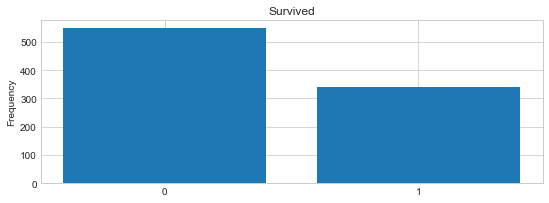

Survived: 
 0    549
1    342
Name: Survived, dtype: int64


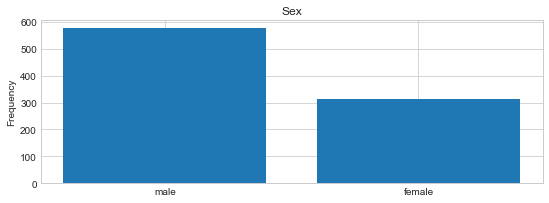

Sex: 
 male      577
female    314
Name: Sex, dtype: int64


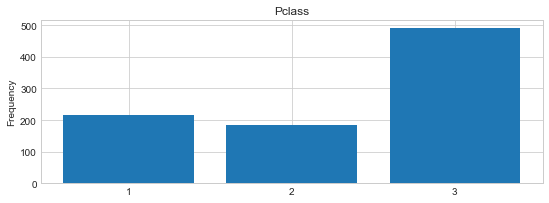

Pclass: 
 3    491
1    216
2    184
Name: Pclass, dtype: int64


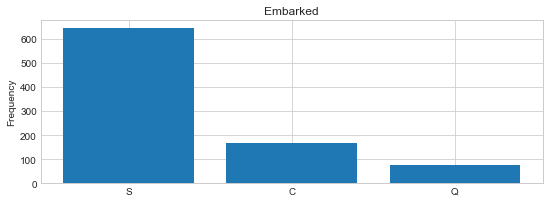

Embarked: 
 S    644
C    168
Q     77
Name: Embarked, dtype: int64


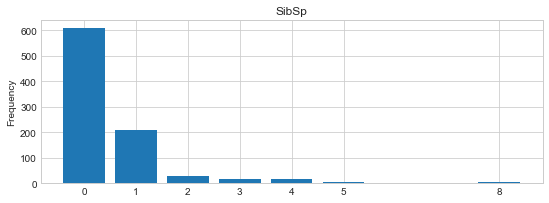

SibSp: 
 0    608
1    209
2     28
4     18
3     16
8      7
5      5
Name: SibSp, dtype: int64


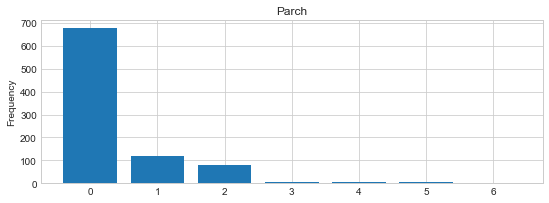

Parch: 
 0    678
1    118
2     80
3      5
5      5
4      4
6      1
Name: Parch, dtype: int64


In [75]:
category1 = ["Survived","Sex","Pclass","Embarked","SibSp", "Parch"]
for c in category1:
    bar_plot(c)

In [76]:
category2 = ["Cabin", "Name", "Ticket"]
for c in category2:
    print("{} \n".format(train_df[c].value_counts()))
    print("---------------------------------")

B96 B98            4
G6                 4
C23 C25 C27        4
C22 C26            3
D                  3
F2                 3
F33                3
E101               3
B77                2
E33                2
D20                2
C78                2
C125               2
C92                2
C93                2
B58 B60            2
C65                2
C126               2
B20                2
C52                2
E8                 2
E25                2
B18                2
D17                2
E67                2
D36                2
B57 B59 B63 B66    2
C2                 2
D35                2
E24                2
C124               2
C68                2
E121               2
B5                 2
B35                2
B28                2
F4                 2
C123               2
B22                2
B51 B53 B55        2
D26                2
C83                2
F G73              2
E44                2
B49                2
D33                2
E17                1
C91          

## 수치형 변수들 값 분포 시각화 - 히스토그램

In [77]:
def plot_hist(variable):
    plt.figure(figsize = (9,3))
    plt.hist(train_df[variable], bins = 50)
    plt.xlabel(variable)
    plt.ylabel("Frequency")
    plt.title("{} distribution with hist".format(variable))
    plt.show()

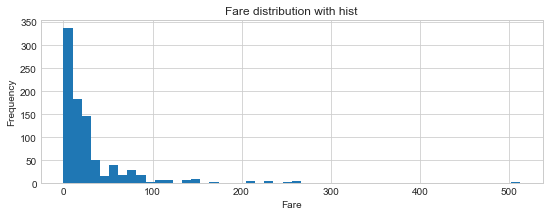

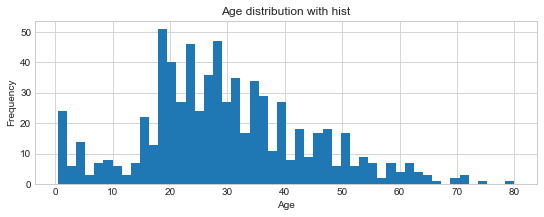

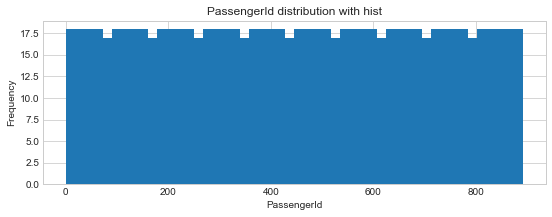

In [78]:
numericVar = ["Fare", "Age","PassengerId"]
for n in numericVar:
    plot_hist(n)

## 기초 데이터 분석

* Pclass - 선실 등급에 따른 생존자 비율
* Sex - 성별에 따른 생존자 비율
* SibSp - 함께 탑승한 형제 또는 자매들의 명수에 따른 생존자 비율
* Parch - 부모와 자식이 함께 존재했는지에 따른 생존자 비율

In [79]:
# 선실 등급에 따른 생존자 비율
train_df[["Pclass","Survived"]].groupby(["Pclass"], as_index = False).mean().sort_values(by="Survived")

,Pclass,Survived
2,3,0.242363
1,2,0.472826
0,1,0.629630


In [80]:
# 성별에 따른 생존자 비율
train_df[["Sex","Survived"]].groupby(["Sex"], as_index = False).mean().sort_values(by="Survived")

,Sex,Survived
1,male,0.188908
0,female,0.742038


In [81]:
# 함께 탑승한 형제 또는 자매들의 명수에 따른 생존자 비율
train_df[["SibSp","Survived"]].groupby(["SibSp"], as_index = False).mean().sort_values(by="Survived")

,SibSp,Survived
5,5,0.000000
6,8,0.000000
4,4,0.166667
3,3,0.250000
0,0,0.345395
2,2,0.464286
1,1,0.535885


In [82]:
# 부모와 자식이 함께 존재했는지에 따른 생존자 비율
train_df[["Parch","Survived"]].groupby(["Parch"], as_index = False).mean().sort_values(by="Survived")

,Parch,Survived
4,4,0.000000
6,6,0.000000
5,5,0.200000
0,0,0.343658
2,2,0.500000
1,1,0.550847
3,3,0.600000


## 이상치 채크와 삭제

In [83]:
def detect_outliers(df,features):
    outlier_indices = []
    
    for c in features:
        # 1st quartile
        Q1 = np.percentile(df[c],25)
        # 3rd quartile
        Q3 = np.percentile(df[c],75)
        # IQR
        IQR = Q3 - Q1
        # Outlier step
        outlier_step = IQR * 1.5
        # detect outlier and their indeces
        outlier_list_col = df[(df[c] < Q1 - outlier_step) | (df[c] > Q3 + outlier_step)].index
        # store indeces
        outlier_indices.extend(outlier_list_col)
    
    outlier_indices = Counter(outlier_indices)
    multiple_outliers = list(i for i, v in outlier_indices.items() if v > 2)
    
    return multiple_outliers

In [84]:
train_df.iloc[27:90]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
27,28,0,1,"Fortune, Mr. Charles Alexander",male,19.00,3,2,19950,263.0000,C23 C25 C27,S
28,29,1,3,"O'Dwyer, Miss. Ellen ""Nellie""",female,NaN,0,0,330959,7.8792,NaN,Q
29,30,0,3,"Todoroff, Mr. Lalio",male,NaN,0,0,349216,7.8958,NaN,S
30,31,0,1,"Uruchurtu, Don. Manuel E",male,40.00,0,0,PC 17601,27.7208,NaN,C
31,32,1,1,"Spencer, Mrs. William Augustus (Marie Eugenie)",female,NaN,1,0,PC 17569,146.5208,B78,C
32,33,1,3,"Glynn, Miss. Mary Agatha",female,NaN,0,0,335677,7.7500,NaN,Q
33,34,0,2,"Wheadon, Mr. Edward H",male,66.00,0,0,C.A. 24579,10.5000,NaN,S
34,35,0,1,"Meyer, Mr. Edgar Joseph",male,28.00,1,0,PC 17604,82.1708,NaN,C
35,36,0,1,"Holverson, Mr. Alexander Oskar",male,42.00,1,0,113789,52.0000,NaN,S
36,37,1,3,"Mamee, Mr. Hanna",male,NaN,0,0,2677,7.2292,NaN,C


In [85]:
train_df.loc[detect_outliers(train_df,["Age","SibSp","Parch","Fare"])]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
27,28,0,1,"Fortune, Mr. Charles Alexander",male,19.0,3,2,19950,263.00,C23 C25 C27,S
88,89,1,1,"Fortune, Miss. Mabel Helen",female,23.0,3,2,19950,263.00,C23 C25 C27,S
159,160,0,3,"Sage, Master. Thomas Henry",male,NaN,8,2,CA. 2343,69.55,NaN,S
180,181,0,3,"Sage, Miss. Constance Gladys",female,NaN,8,2,CA. 2343,69.55,NaN,S
201,202,0,3,"Sage, Mr. Frederick",male,NaN,8,2,CA. 2343,69.55,NaN,S
324,325,0,3,"Sage, Mr. George John Jr",male,NaN,8,2,CA. 2343,69.55,NaN,S
341,342,1,1,"Fortune, Miss. Alice Elizabeth",female,24.0,3,2,19950,263.00,C23 C25 C27,S
792,793,0,3,"Sage, Miss. Stella Anna",female,NaN,8,2,CA. 2343,69.55,NaN,S
846,847,0,3,"Sage, Mr. Douglas Bullen",male,NaN,8,2,CA. 2343,69.55,NaN,S
863,864,0,3,"Sage, Miss. Dorothy Edith ""Dolly""",female,NaN,8,2,CA. 2343,69.55,NaN,S


In [86]:
# drop outliers
train_df = train_df.drop(detect_outliers(train_df,["Age","SibSp","Parch","Fare"]),axis = 0).reset_index(drop = True)

In [87]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 881 entries, 0 to 880
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  881 non-null    int64  
 1   Survived     881 non-null    int64  
 2   Pclass       881 non-null    int64  
 3   Name         881 non-null    object 
 4   Sex          881 non-null    object 
 5   Age          711 non-null    float64
 6   SibSp        881 non-null    int64  
 7   Parch        881 non-null    int64  
 8   Ticket       881 non-null    object 
 9   Fare         881 non-null    float64
 10  Cabin        201 non-null    object 
 11  Embarked     879 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 82.7+ KB


In [88]:
train_df.iloc[27:90]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
27,29,1,3,"O'Dwyer, Miss. Ellen ""Nellie""",female,NaN,0,0,330959,7.8792,NaN,Q
28,30,0,3,"Todoroff, Mr. Lalio",male,NaN,0,0,349216,7.8958,NaN,S
29,31,0,1,"Uruchurtu, Don. Manuel E",male,40.00,0,0,PC 17601,27.7208,NaN,C
30,32,1,1,"Spencer, Mrs. William Augustus (Marie Eugenie)",female,NaN,1,0,PC 17569,146.5208,B78,C
31,33,1,3,"Glynn, Miss. Mary Agatha",female,NaN,0,0,335677,7.7500,NaN,Q
32,34,0,2,"Wheadon, Mr. Edward H",male,66.00,0,0,C.A. 24579,10.5000,NaN,S
33,35,0,1,"Meyer, Mr. Edgar Joseph",male,28.00,1,0,PC 17604,82.1708,NaN,C
34,36,0,1,"Holverson, Mr. Alexander Oskar",male,42.00,1,0,113789,52.0000,NaN,S
35,37,1,3,"Mamee, Mr. Hanna",male,NaN,0,0,2677,7.2292,NaN,C
36,38,0,3,"Cann, Mr. Ernest Charles",male,21.00,0,0,A./5. 2152,8.0500,NaN,S


In [89]:
## 결측치 채크와 채우기

In [90]:
test_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pclass       418 non-null    int64  
 2   Name         418 non-null    object 
 3   Sex          418 non-null    object 
 4   Age          332 non-null    float64
 5   SibSp        418 non-null    int64  
 6   Parch        418 non-null    int64  
 7   Ticket       418 non-null    object 
 8   Fare         417 non-null    float64
 9   Cabin        91 non-null     object 
 10  Embarked     418 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 36.0+ KB


In [91]:
train_df_len = len(train_df)
train_df = pd.concat([train_df,test_df],axis = 0).reset_index(drop = True)

In [92]:
train_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0.0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1.0,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1.0,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1.0,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0.0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [93]:
train_df.columns[train_df.isnull().any()]

Index(['Survived', 'Age', 'Fare', 'Cabin', 'Embarked'], dtype='object')

In [94]:
train_df.isnull().sum()

PassengerId       0
Survived        418
Pclass            0
Name              0
Sex               0
Age             256
SibSp             0
Parch             0
Ticket            0
Fare              1
Cabin          1007
Embarked          2
dtype: int64

In [95]:
train_df[train_df["Embarked"].isnull()]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
60,62,1.0,1,"Icard, Miss. Amelie",female,38.0,0,0,113572,80.0,B28,NaN
821,830,1.0,1,"Stone, Mrs. George Nelson (Martha Evelyn)",female,62.0,0,0,113572,80.0,B28,NaN


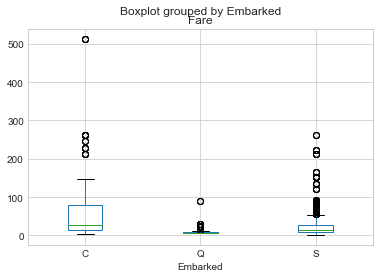

In [96]:
train_df.boxplot(column="Fare",by = "Embarked")
plt.show()

In [97]:
train_df["Embarked"] = train_df["Embarked"].fillna("C")
train_df[train_df["Embarked"].isnull()]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked


In [98]:
train_df[train_df["Fare"].isnull()]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
1033,1044,NaN,3,"Storey, Mr. Thomas",male,60.5,0,0,3701,NaN,NaN,S


In [99]:
train_df["Fare"] = train_df["Fare"].fillna(np.mean(train_df[train_df["Pclass"] == 3]["Fare"]))

In [100]:
train_df[train_df["Fare"].isnull()]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked


## 시각화를 통한 변수들간의 관계 파악

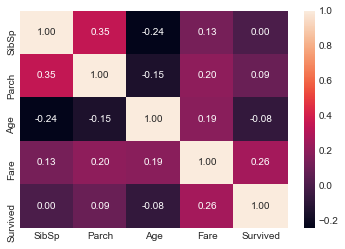

In [101]:
list1 = ["SibSp", "Parch", "Age", "Fare", "Survived"]
sns.heatmap(train_df[list1].corr(), annot = True, fmt = ".2f")
plt.show()

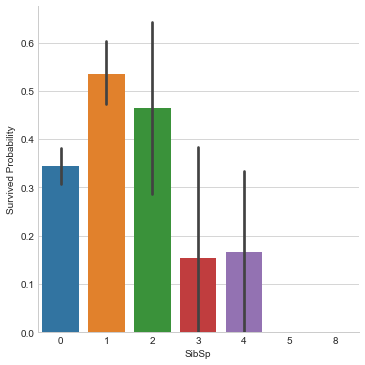

In [102]:
g = sns.catplot(x = "SibSp", y = "Survived", data = train_df, kind = "bar")
g.set_ylabels("Survived Probability")
plt.show()

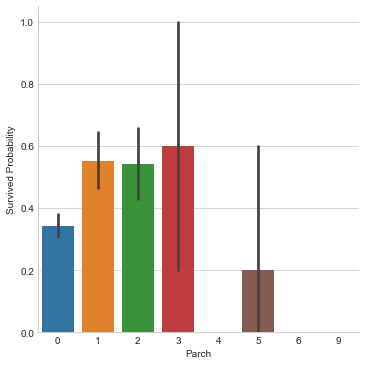

In [103]:
g = sns.catplot(x = "Parch", y = "Survived", kind = "bar", data = train_df)
g.set_ylabels("Survived Probability")
plt.show()

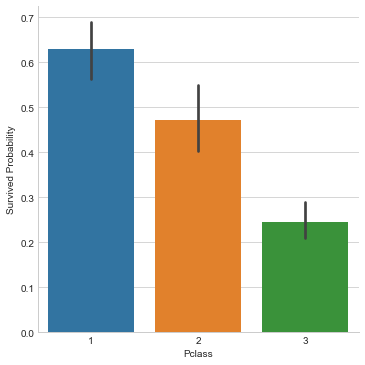

In [104]:
g = sns.catplot(x = "Pclass", y = "Survived", data = train_df, kind = "bar")
g.set_ylabels("Survived Probability")
plt.show()

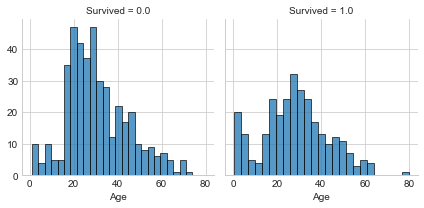

In [105]:
g = sns.FacetGrid(train_df, col = "Survived")
g.map(sns.histplot, "Age", bins = 25)
plt.show()

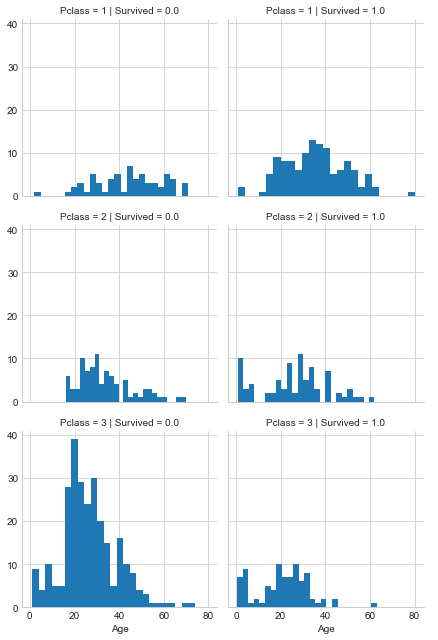

In [106]:
g = sns.FacetGrid(train_df, col = "Survived", row = "Pclass")
g.map(plt.hist, "Age", bins = 25)
g.add_legend()
plt.show()

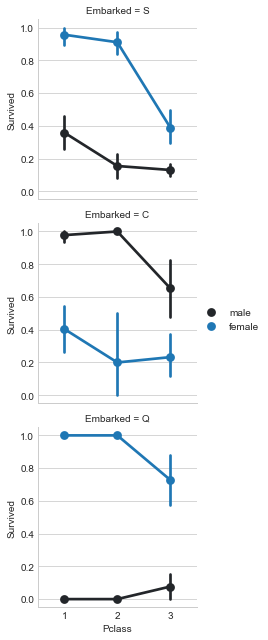

In [107]:
g = sns.FacetGrid(train_df, row = "Embarked")
g.map(sns.pointplot, "Pclass","Survived","Sex")
g.add_legend()
plt.show()

In [108]:
train_df[train_df["Age"].isnull()]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
5,6,0.0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
17,18,1.0,2,"Williams, Mr. Charles Eugene",male,NaN,0,0,244373,13.0000,NaN,S
19,20,1.0,3,"Masselmani, Mrs. Fatima",female,NaN,0,0,2649,7.2250,NaN,C
26,27,0.0,3,"Emir, Mr. Farred Chehab",male,NaN,0,0,2631,7.2250,NaN,C
27,29,1.0,3,"O'Dwyer, Miss. Ellen ""Nellie""",female,NaN,0,0,330959,7.8792,NaN,Q
28,30,0.0,3,"Todoroff, Mr. Lalio",male,NaN,0,0,349216,7.8958,NaN,S
30,32,1.0,1,"Spencer, Mrs. William Augustus (Marie Eugenie)",female,NaN,1,0,PC 17569,146.5208,B78,C
31,33,1.0,3,"Glynn, Miss. Mary Agatha",female,NaN,0,0,335677,7.7500,NaN,Q
35,37,1.0,3,"Mamee, Mr. Hanna",male,NaN,0,0,2677,7.2292,NaN,C
41,43,0.0,3,"Kraeff, Mr. Theodor",male,NaN,0,0,349253,7.8958,NaN,C


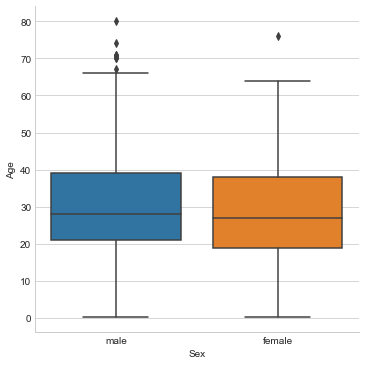

In [109]:
sns.catplot(x = "Sex", y = "Age", data = train_df, kind = "box")
plt.show()

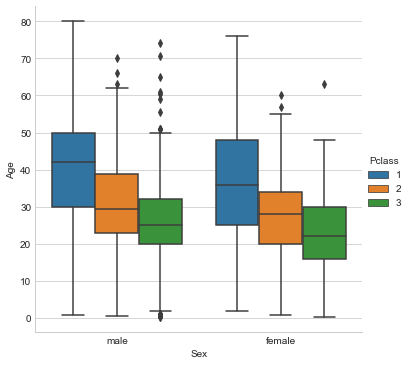

In [110]:
sns.catplot(x = "Sex", y = "Age", hue = "Pclass",data = train_df, kind = "box")
plt.show()

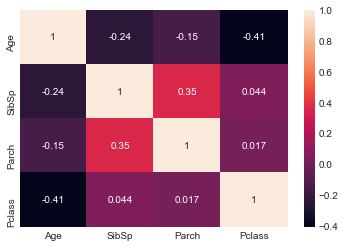

In [111]:
sns.heatmap(train_df[["Age","Sex","SibSp","Parch","Pclass"]].corr(), annot = True)
plt.show()

In [112]:
index_nan_age = list(train_df["Age"][train_df["Age"].isnull()].index)
for i in index_nan_age:
    age_pred = train_df["Age"][((train_df["SibSp"] == train_df.iloc[i]["SibSp"]) &(train_df["Parch"] == train_df.iloc[i]["Parch"])& (train_df["Pclass"] == train_df.iloc[i]["Pclass"]))].median()
    age_med = train_df["Age"].median()
    if not np.isnan(age_pred):
        train_df["Age"].iloc[i] = age_pred
    else:
        train_df["Age"].iloc[i] = age_med

In [113]:
train_df[train_df["Age"].isnull()]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked


## 피쳐 엔지니어링

### Name -- Title

In [ ]:
train_df["Name"].head(10)

In [ ]:
name = train_df["Name"]
train_df["Title"] = [i.split(".")[0].split(",")[-1].strip() for i in name]

In [ ]:
train_df["Title"].head(10)

In [ ]:
sns.countplot(x="Title", data = train_df)
plt.xticks(rotation = 60)
plt.show()

In [ ]:
train_df["Title"] = train_df["Title"].replace(["Lady","the Countess","Capt","Col","Don","Dr","Major","Rev","Sir","Jonkheer","Dona"],"other")
train_df["Title"] = [0 if i == "Master" else 1 if i == "Miss" or i == "Ms" or i == "Mlle" or i == "Mrs" else 2 if i == "Mr" else 3 for i in train_df["Title"]]
train_df["Title"].head(20)

In [ ]:
sns.countplot(x="Title", data = train_df)
plt.xticks(rotation = 60)
plt.show()

In [ ]:
g = sns.catplot(x = "Title", y = "Survived", data = train_df, kind = "bar")
g.set_xticklabels(["Master","Mrs","Mr","Other"])
g.set_ylabels("Survival Probability")
plt.show()

In [ ]:
train_df.drop(labels = ["Name"], axis = 1, inplace = True)

In [ ]:
train_df.head()

In [ ]:
train_df = pd.get_dummies(train_df,columns=["Title"])
train_df.head()

### Family Size

In [ ]:
train_df.head()

In [ ]:
train_df["Fsize"] = train_df["SibSp"] + train_df["Parch"] + 1

In [ ]:
train_df.head()

In [ ]:
g = sns.catplot(x = "Fsize", y = "Survived", data = train_df, kind = "bar")
g.set_ylabels("Survival")
plt.show()

In [ ]:
train_df["family_size"] = [1 if i < 5 else 0 for i in train_df["Fsize"]]

In [ ]:
train_df.head(10)

In [ ]:
sns.countplot(x = "family_size", data = train_df)
plt.show()

In [ ]:
g = sns.catplot(x = "family_size", y = "Survived", data = train_df, kind = "bar")
g.set_ylabels("Survival")
plt.show()

In [ ]:
train_df = pd.get_dummies(train_df, columns= ["family_size"])
train_df.head()

### Embarked

In [ ]:
train_df["Embarked"].head()

In [ ]:
sns.countplot(x = "Embarked", data = train_df)
plt.show()

In [ ]:
train_df = pd.get_dummies(train_df, columns=["Embarked"])
train_df.head()

### Ticket

In [ ]:
train_df["Ticket"].head(20)

In [ ]:
a = "A/5. 2151"
a.replace(".","").replace("/","").strip().split(" ")[0]

In [ ]:

tickets = []
for i in list(train_df.Ticket):
    if not i.isdigit():
        tickets.append(i.replace(".","").replace("/","").strip().split(" ")[0])
    else:
        tickets.append("x")
train_df["Ticket"] = tickets

In [ ]:
train_df["Ticket"].head(20)

In [ ]:
train_df.head()

In [ ]:
train_df = pd.get_dummies(train_df, columns= ["Ticket"], prefix = "T")
train_df.head(10)

### Pclass

In [ ]:
sns.countplot(x = "Pclass", data = train_df)
plt.show()

In [ ]:
train_df["Pclass"] = train_df["Pclass"].astype("category")
train_df = pd.get_dummies(train_df, columns= ["Pclass"])
train_df.head()

### Sex

In [ ]:
train_df["Sex"] = train_df["Sex"].astype("category")
train_df = pd.get_dummies(train_df, columns=["Sex"])
train_df.head()

### Drop Passenger ID and Cabin

In [ ]:
train_df.drop(labels = ["PassengerId", "Cabin"], axis = 1, inplace = True)

In [ ]:
train_df.columns

## Modeling

In [ ]:
from sklearn.linear_model import LogisticRegression


### Train - Test Split

In [ ]:
train_df_len

In [ ]:
test = train_df[train_df_len:]
test.drop(labels = ["Survived"],axis = 1, inplace = True)

In [ ]:
test.head()

In [ ]:
from sklearn.model_selection import train_test_split

train = train_df[:train_df_len]
X_train = train.drop(labels = "Survived", axis = 1)
y_train = train["Survived"]
X_train, X_test, y_train, y_test = train_test_split(X_train, y_train, test_size = 0.33, random_state = 42)
print("X_train",len(X_train))
print("X_test",len(X_test))
print("y_train",len(y_train))
print("y_test",len(y_test))
print("test",len(test))

### Simple Logistic Regression

In [ ]:
logreg = LogisticRegression()
logreg.fit(X_train, y_train)
acc_log_train = round(logreg.score(X_train, y_train)*100,2) 
acc_log_test = round(logreg.score(X_test,y_test)*100,2)
print("Training Accuracy: % {}".format(acc_log_train))
print("Testing Accuracy: % {}".format(acc_log_test))

### https://www.kaggle.com/kanncaa1/dataiteam-titanic-eda